<a href="https://colab.research.google.com/github/shumshersubashgautam/QuantumMLEDXSolution-Colab/blob/master/3_0_evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Ranlot/edX---Quantum-Machine-Learning.git

Cloning into 'edX---Quantum-Machine-Learning'...
remote: Enumerating objects: 112, done.
remote: Total 112 (delta 0), reused 0 (delta 0), pack-reused 112
Receiving objects: 100% (112/112), 75.45 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [2]:
cd /content/edX---Quantum-Machine-Learning

/content/edX---Quantum-Machine-Learning


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 163kB 15.4MB/s 
     |████████████████████████████████| 430kB 75.7MB/s 
     |████████████████████████████████| 15.9MB 54.5MB/s 
     |████████████████████████████████| 2.4MB 42.5MB/s 
     |████████████████████████████████| 808kB 41.0MB/s 
     |████████████████████████████████| 81kB 12.8MB/s 
     |████████████████████████████████| 2.8MB 46.1MB/s 
     |████████████████████████████████| 122kB 59.8MB/s 
     |████████████████████████████████| 768kB 67.2MB/s 
     |████████████████████████████████| 112kB 68.3MB/s 
     |████████████████████████████████| 184kB 60.1MB/s 
     |████████████████████████████████| 133kB 66.2MB/s 
     |████████████████████████████████| 92kB 14.4MB/s 
     |████████████████████████████████| 133kB 66.0MB/s 
     |████████████████████████████████| 952kB 54.3MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 12.9MB 17.4M

In [5]:
!pip install qiskit

     |████████████████████████████████| 1.6MB 4.8MB/s 
     |████████████████████████████████| 17.3MB 25.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 983kB 44.6MB/s 
  Using cached https://files.pythonhosted.org/packages/a3/58/35da89ee790598a0700ea49b2a66594140f44dec458c07e8e3d4979137fc/ply-3.11-py2.py3-none-any.whl
     |████████████████████████████████| 5.3MB 48.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 21.7MB 400kB/s 
     |████████████████████████████████| 563kB 51.7MB/s 
     |████████████████████████████████| 2.3MB 41.0MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.13.0-cp36-none-any.whl size=1399 sha256=8cce82de29a198a72bd8ed833be048ca5bbd474981

In [0]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer
from qiskit.tools.visualization import circuit_drawer
np.set_printoptions(precision=7, suppress=True)

backend_statevector = BasicAer.get_backend('statevector_simulator')
q, c = QuantumRegister(1), ClassicalRegister(1)

In [45]:
X = np.array([[0, 1], [1, 0]])

print("X X†\n")
print(X.dot(X.T.conj()))

print("\nX† X\n")
print(X.T.conj().dot(X))

X X†

[[1 0]
 [0 1]]

X† X

[[1 0]
 [0 1]]


In [46]:
zero_ket = np.array([[1], [0]])

print("The norm of the state |0> before applying X = %f\n" % np.linalg.norm(zero_ket))
print("The norm of the state after applying X = %f" % np.linalg.norm(X.dot(zero_ket)))

The norm of the state |0> before applying X = 1.000000

The norm of the state after applying X = 1.000000


In [47]:
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
circuit.x(q[0])
job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))

[1.+0.j 0.+0.j]


In [48]:
def mixed_state(densityMatrix, visibility):
    maximally_mixed_state = np.eye(4) / 2**2
    return (visibility * densityMatrix) + (1 - visibility) * maximally_mixed_state

øKet = np.array([[1], [0], [0], [1]]) / np.sqrt(2)
øBra = øKet.T.conj()

øRho = øKet.dot(øBra)
print('density matrix of |ø>\n\n', øRho)

density matrix of |ø>

 [[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


In [50]:
print("Maximum visibility is a pure state:")
print(mixed_state(øRho, 1.0))

print("The state is still entangled with visibility 0.8:")
print(mixed_state(øRho, 0.5))

print("No coherence left:")
print(mixed_state(øRho, 0))

Maximum visibility is a pure state:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
The state is still entangled with visibility 0.8:
[[0.375 0.    0.    0.25 ]
 [0.    0.125 0.    0.   ]
 [0.    0.    0.125 0.   ]
 [0.25  0.    0.    0.375]]
No coherence left:
[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]


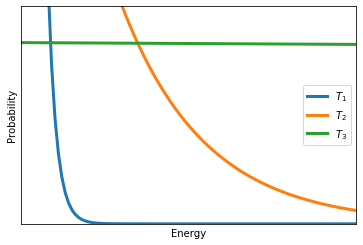

In [51]:
import matplotlib.pyplot as plt

temperatures = [.5, 5, 2000]
energies = np.linspace(0, 20, 100)

fig, ax = plt.subplots()

for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    Z = probabilities.sum()
    probabilities /= Z
    ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$")

ax.set_xlim(0, 20); ax.set_ylim(0, 1.2 * probabilities.max())
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('Energy'); ax.set_ylabel('Probability'); ax.legend()